## Importing the required libraries

In [ ]:
# Helper Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [ ]:
from keras.utils import np_utils

from keras.models import Sequential 

from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(25)

## Step-1 Load the dataset

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [ ]:
X_train.shape

(60000, 28, 28)

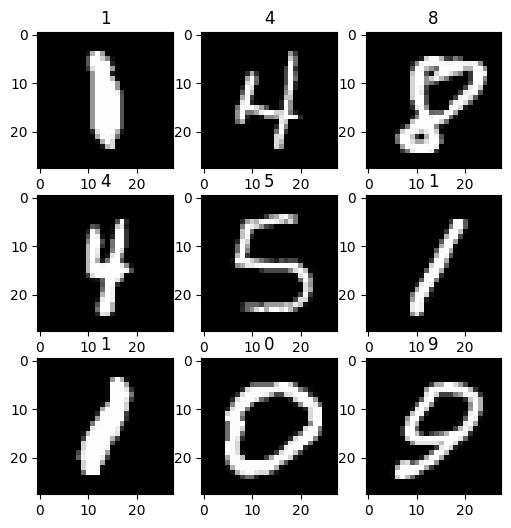

In [ ]:
plt.figure(figsize=(6,6))

idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
  plt.subplot(3,3,i+1)
  plt.title(y_train[idx[i]])
  grid_data = np.reshape(X_train[idx[i]], (28,28))
  plt.imshow(grid_data, cmap='gray')

In [ ]:
y_train[1]

0

## Step-2 Data Preprocessing

In [ ]:
# Type Conversion of Columns
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

'''
- Changing the b/w image from 2D to 3D.
- For RGB image reshape isnot required.
'''

# Adding the channel
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train.shape

(60000, 28, 28, 1)

In [ ]:
# One Hot Encoding

number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

print("Class label of first image :", y_train[0])
print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Step-4 Building the Model

In [ ]:
# STEP-1 Define the Model

model = Sequential()

# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation = 'relu'))

# conv3-64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# FC-128
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))

# FC-10
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

**Data Augmentation**

1. Inavailability of data
2. To Add different forms to the data

In [ ]:
gen = ImageDataGenerator(rotation_range=8,
                         width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08, 
                         zoom_range=0.08,
                         # horizontal_flip = True, # horizontal flip changes the numbers 
                         brightness_range=[0.2,1.2])

test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs = 10)

# steps per epoch is decided based on total data size in train data divided by batch size.
# model.fit(train_generator,
#           batch_size = 64,
#           # steps_per_epoch = 60000//64,
#           epochs = 5, 
#           validation_data = test_generator,
#           validation_steps = 10000//64)

Epoch 1/10
469/469 [==============================] - 202s 429ms/step - loss: 0.2392 - accuracy: 0.9272
Epoch 2/10
469/469 [==============================] - 199s 425ms/step - loss: 0.0820 - accuracy: 0.9763
Epoch 3/10
469/469 [==============================] - 200s 426ms/step - loss: 0.0611 - accuracy: 0.9813
Epoch 4/10
469/469 [==============================] - 199s 424ms/step - loss: 0.0524 - accuracy: 0.9835
Epoch 5/10
469/469 [==============================] - 199s 424ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 6/10
469/469 [==============================] - 197s 420ms/step - loss: 0.0387 - accuracy: 0.9880
Epoch 7/10
469/469 [==============================] - 196s 418ms/step - loss: 0.0366 - accuracy: 0.9884
Epoch 8/10
469/469 [==============================] - 200s 427ms/step - loss: 0.0305 - accuracy: 0.9902
Epoch 9/10
469/469 [==============================] - 200s 427ms/step - loss: 0.0293 - accuracy: 0.9904
Epoch 10/10
469/469 [==============================] - 200s 426m

In [ ]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 11s 34ms/step - loss: 0.0300 - accuracy: 0.9909

Test accuracy:  0.9908999800682068


In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=1)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.head(50)

313/313 [==============================] - 11s 35ms/step


,Actual,Predictions
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


## Prediction on a single Image

In [ ]:
img=X_test[30]

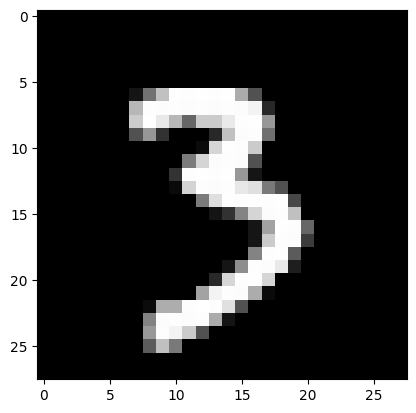

In [ ]:
plt.imshow(img[:,:,0], cmap='gray')

In [ ]:
"Actual Class:",y_test[30]

('Actual Class:', 3)

In [ ]:
import cv2

img = cv2.resize(img,(28,28))
img = np.reshape(img,[1,28,28,1])

In [ ]:
classes = model.predict(img)
print(classes)

1/1 [==============================] - 0s 64ms/step
[[1.3844416e-14 2.9191971e-14 6.2793233e-13 1.0000000e+00 8.9209307e-15
  2.2587832e-09 9.0459628e-18 2.0828270e-12 4.4967979e-13 6.1031680e-10]]


In [ ]:
print("Predicted Class Label: ", np.argmax(classes,axis=1))

Predicted Class Label:  [3]
